In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import obspy
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

In [2]:
chan, x, y, z = np.loadtxt("Data/Surface_DAS_DTS_UTM_coordinates.csv", delimiter=',',skiprows=2, unpack=True)

xyselector = np.logical_and(x>10000,y>10000)

In [3]:
chan = chan[xyselector]
x = x[xyselector]
y = y[xyselector]
z = z[xyselector]
len(x)

8621

In [4]:
azimuth = np.rad2deg(np.arctan2(x[1:]-x[:-1],y[1:]-y[:-1]))
corners = np.hstack([0, np.abs(azimuth[1:]-azimuth[:-1]) > 10, 0])
near_corners_selector = np.array([True for i in range(len(corners))])
for i, c in enumerate(corners):
    if c == 1:
        near_corners_selector[i-5:i+6] = False
        
azimuth = np.hstack([azimuth, azimuth[-1]]) # add an azimuth for the final channel

In [5]:
chan = chan[near_corners_selector]
x = x[near_corners_selector]
y = y[near_corners_selector]
z = z[near_corners_selector]
azimuth = azimuth[near_corners_selector]
len(x)

7804

In [55]:
points = np.array([x,y]).T
corners = np.load("Data/rectangle_corners.npy")
vec1 = corners[:,0]-corners[:,1]
vec2 = corners[:,2]-corners[:,1]
l1 = np.sqrt(np.sum(np.square(vec1)))
l2 = np.sqrt(np.sum(np.square(vec2)))
t1 = np.linspace(0, l1, 33)
t2 = np.linspace(0, l2, 129)

t1 = (t1[1:]+t1[:-1])/2
t2 = (t2[1:]+t2[:-1])/2

domain_azimuth = np.rad2deg(np.arctan2(vec2[0], vec2[1]))
azimuth_corr = azimuth-domain_azimuth
rac = np.deg2rad(azimuth_corr)

points_corr = points-corners[:,1]
proj_1 = l1*(points_corr@vec1[:,np.newaxis] / np.sum(np.square(vec1))).flatten()
proj_2 = l2*(points_corr@vec2[:,np.newaxis] / np.sum(np.square(vec2))).flatten()

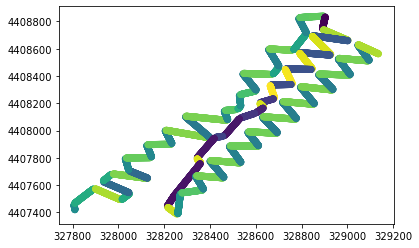

In [12]:
plt.scatter(x,y,c=azimuth)

In [40]:
def p_sens(c, k, g, th, ph1, ph2):
    return 2 * c * k * np.cos(ph1-th)*np.cos(ph2)*np.sin(g*k*np.cos(ph1-th)*np.cos(ph2)/2)/g

def sv_sens(c, k, g, th, ph1, ph2):
    return -c * k * np.cos(ph1-th)*np.sin(2*ph2)*np.sin(g*k*np.cos(ph1-th)*np.cos(ph2)/2)/g/np.cos(ph2)

def sh_sens(c, k, g, th, ph1, ph2):
    return 2 * c * k * np.sin(ph1-th)*np.sin(g*k*np.cos(ph1-th)*np.cos(ph2)/2)/g

In [41]:
evla = 38.479
evlo = -118.366
edep = 10

stla = 39.8
stlo = -119.01


dist, az, baz = obspy.geodetics.gps2dist_azimuth(evla, evlo, stla, stlo)

In [42]:
otime = obspy.UTCDateTime(2016,3,21,7,37,10)
ptime = obspy.UTCDateTime(2016,3,21, 7, 37, 21+162/10)
stime = obspy.UTCDateTime(2016,3,21, 7, 37, 21+352/10)

In [43]:
pslow = (ptime-otime)/dist
sslow = (stime-otime)/dist

In [44]:
pvel = 1300
svel = pvel / np.sqrt(3)

In [45]:
inc_p = np.arcsin(pvel*pslow)
inc_s = np.arcsin(svel*sslow)
np.rad2deg(inc_p), np.rad2deg(inc_s)

(13.027214613936435, 12.770786833998459)

In [56]:
f = 2.5
pwl = pvel / f
swl = svel / f
g = 10

th = np.pi/2 - np.deg2rad(azimuth)
ph1 = np.pi/2 - (np.deg2rad(baz)-np.pi)

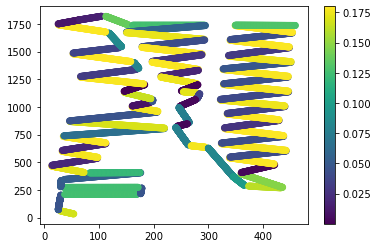

In [57]:
plt.scatter(proj_1,proj_2,c=np.abs(p_sens(pvel, 2*np.pi/pwl, g, th, ph1, inc_p)))
plt.colorbar()

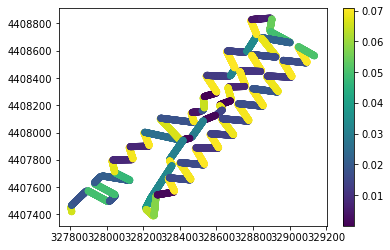

In [48]:
plt.scatter(x,y,c=np.abs(sv_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s)))
plt.colorbar()

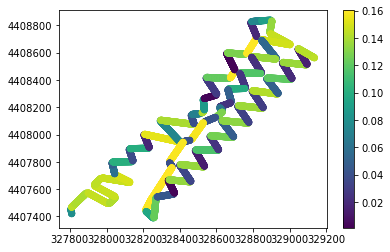

In [49]:
plt.scatter(x,y,c=np.abs(sh_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s)))
plt.colorbar()

In [ ]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

fig5 = plt.figure(constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

In [59]:
import matplotlib as mpl
import matplotlib.gridspec as gridspec

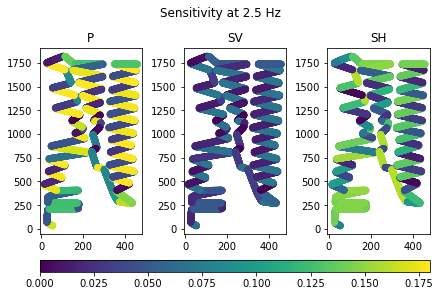

In [145]:
f = 2.5
pwl = pvel / f
swl = svel / f
psense = np.abs(p_sens(pvel, 2*np.pi/pwl, g, th, ph1, inc_p))
svsense = np.abs(sv_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s))
shsense = np.abs(sh_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s))
norm = mpl.colors.Normalize(vmin=0.0,vmax=np.max(psense))


fig = plt.figure(constrained_layout=True)
widths = [1, 1, 1]
heights = [4, 0.25]
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios = widths, height_ratios = heights)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
cax = fig.add_subplot(spec[1,:])

cax_map = ax1.scatter(proj_1, proj_2, c=psense, norm=norm)
ax1.set_title("P")
ax2.scatter(proj_1, proj_2, c=svsense, norm=norm)
ax2.set_title("SV")
ax3.scatter(proj_1, proj_2, c=shsense, norm=norm)
ax3.set_title("SH")
fig.colorbar(cax_map, cax=cax, ax=[ax1, ax2, ax3], orientation="horizontal")

fig.suptitle(f"Sensitivity at {f} Hz")

fig.savefig(f"tmp/sensitivity_plot_{int(f*100)}.pdf")

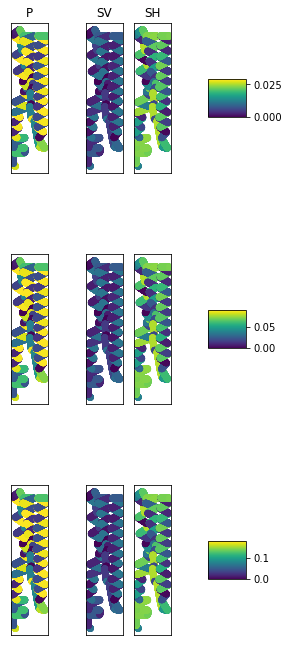

In [127]:
fig, axes = plt.subplots(3,4,
                         figsize=(2.75,10), 
                         gridspec_kw={"width_ratios":np.array([[1,1,1,0.05],[1,1,1,0.05],[1,1,1,0.05]]).T})


f = 1.0
pwl = pvel / f
swl = svel / f

psense = np.abs(p_sens(pvel, 2*np.pi/pwl, g, th, ph1, inc_p))
norm = mpl.colors.Normalize(vmin=0.0,vmax=np.max(psense))
cax1 = axes[0,0].scatter(proj_1,proj_2,c=psense, norm=norm)
axes[0,0].set_title("P")
axes[0,1].scatter(proj_1,proj_2,c=np.abs(sv_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s)), norm=norm)
axes[0,1].set_title("SV")
axes[0,2].scatter(proj_1,proj_2,c=np.abs(sh_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s)), norm=norm)
axes[0,2].set_title("SH")


f = 1.75
pwl = pvel / f
swl = svel / f

psense = np.abs(p_sens(pvel, 2*np.pi/pwl, g, th, ph1, inc_p))
norm = mpl.colors.Normalize(vmin=0.0,vmax=np.max(psense))
cax2 = axes[1,0].scatter(proj_1,proj_2,c=psense, norm=norm)
axes[1,1].scatter(proj_1,proj_2,c=np.abs(sv_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s)), norm=norm)
axes[1,2].scatter(proj_1,proj_2,c=np.abs(sh_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s)), norm=norm)


f = 2.5
pwl = pvel / f
swl = svel / f

psense = np.abs(p_sens(pvel, 2*np.pi/pwl, g, th, ph1, inc_p))
norm = mpl.colors.Normalize(vmin=0.0,vmax=np.max(psense))
cax3 = axes[2,0].scatter(proj_1,proj_2,c=psense, norm=norm)
axes[2,1].scatter(proj_1,proj_2,c=np.abs(sv_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s)), norm=norm)
axes[2,2].scatter(proj_1,proj_2,c=np.abs(sh_sens(svel, 2*np.pi/swl, g, th, ph1, inc_s)), norm=norm)


for ax in axes.flatten():
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    

fig.colorbar(cax1, cax=axes[0,3], ax=[axes[0,0], axes[0,1], axes[0,2]])
fig.colorbar(cax2, cax=axes[1,3], ax=[axes[1,0], axes[1,1], axes[1,2]])
fig.colorbar(cax3, cax=axes[2,3], ax=[axes[2,0], axes[2,1], axes[2,2]])

fig.tight_layout()
# axins1 = inset_axes(axes[0,2],
#                    width="5%",
#                    height="100%",
#                    loc='lower left',
#                    bbox_to_anchor=(1.5, 0., 0,0),
#                    borderpad=1,
#                    )

# fig.colorbar(cax1, ax=axins1)

# axins2 = inset_axes(axes[1,2],
#                    width="5%",
#                    height="100%",
#                    loc='lower center',
#                    bbox_to_anchor=(1.5, 0., 1, 1),
#                    borderpad=1,
#                    )

# fig.colorbar(cax2, ax=axins2)

# axins3 = inset_axes(axes[2,2],
#                    width="5%",
#                    height="100%",
#                    loc='lower right',
#                    bbox_to_anchor=(1.5, 0., 1, 1),
#                    borderpad=1,
#                    )

# fig.colorbar(cax3, ax=axins3)